In [45]:
import numpy as np
import xarray as xr
import pandas as pd
import geopandas as gpd
import seaborn as sns
from tqdm import tqdm
tqdm.pandas()

In [44]:
gdf_train = gpd.read_feather(r"D:\Maestría\Tesis\Repo\data\data_out\train_datasets\mobnet_v3_large_size128_tiles1_sample1_stacked_2018_20p_train_dataframe.feather")
gdf_test = gpd.read_feather(r"D:\Maestría\Tesis\Repo\data\data_out\test_datasets\mobnet_v3_large_size128_tiles1_sample1_stacked_2018_20p_test_dataframe.feather")

In [23]:
viirs = xr.open_dataset(r"D:\Maestría\Tesis\Repo\data\data_in\Nightime lights\VIIRS_annual_20130101.tif")
viirs = viirs.sel(band=1)

c:\Users\ofici\AppData\Local\Programs\Python\Python311\Lib\site-packages\xarray\backends\plugins.py:159: RuntimeWarning: 'ee' fails while guessing
  warnings.warn(f"{engine!r} fails while guessing", RuntimeWarning)


In [47]:
def compute_mean_nightlight(polygon):
    mean_nightlight = viirs.rio.clip([polygon]).band_data.mean().item()
    return mean_nightlight

gdf_train["mean_nightlight"] = gdf_train.geometry.progress_apply(compute_mean_nightlight)
gdf_test["mean_nightlight"] = gdf_test.geometry.progress_apply(compute_mean_nightlight)

100%|██████████| 1730/1730 [03:16<00:00,  8.81it/s]


In [48]:
gdf_train[["mean_nightlight","var"]].corr()

,mean_nightlight,var
mean_nightlight,1.000000,0.341491
var,0.341491,1.000000


<Axes: xlabel='mean_nightlight', ylabel='var'>

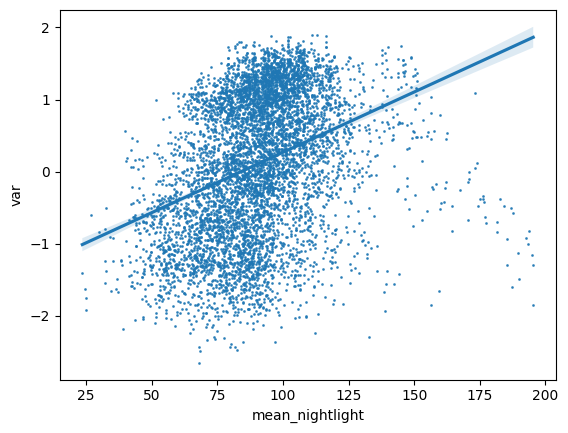

In [49]:
# Sobre el conjunto de train
sns.regplot(x=gdf_train["mean_nightlight"], y=gdf_train["var"], scatter_kws={"s":1})

In [53]:
from sklearn.linear_model import LinearRegression
X = np.array(gdf_train["mean_nightlight"]).reshape(-1,1)
y = np.array(gdf_train["var"]).reshape(-1,1)

model = LinearRegression().fit(X, y)
model.score(X, y)

0.11661626796705404

In [58]:
from sklearn.linear_model import LinearRegression
X = np.array(gdf_test["mean_nightlight"]).reshape(-1,1)
y = np.array(gdf_test["var"]).reshape(-1,1)

r2_test = model.score(X, y)
print("El R2 del modelo en el conjunto de prueba es: ", r2_test*100, "%")

El R2 del modelo en el conjunto de prueba es:  27.05225808608325 %
